In [1]:
import numpy as np

class Perceptron:
    def __init__(self, num_features, learning_rate=0.1, epochs=100):
        self.weights = np.random.rand(num_features + 1)  # +1 for the bias term
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activate(self, x):
        if(x>=0):
            return 1
        else:
            return -1

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.activate(summation)

    def train(self, training_data, labels):
        for _ in range(self.epochs):
            for inputs, label in zip(training_data, labels):
                prediction = self.predict(inputs)
                update = self.learning_rate * (label - prediction)
                self.weights[1:] += update * inputs
                self.weights[0] += update
#                 print('updated')

# Training data: [weight, redness]
training_data = np.array([
    [150, 250],  # Apple
    [200, 240],  # Apple
    [100, 30],  # Orange
    [180, 240],  # Apple
    [80, 20],  # Orange
    [220, 200],   # Apple
    [81, 20],  # Orange
    [50, 22],  # Orang
])

# Labels: 1 for Apple, 0 for Orange
labels = np.array([1, 1, 0, 1, 0, 1,0,0])

# Create and train the perceptron
perceptron = Perceptron(num_features=2)
perceptron.train(training_data, labels)

# Test the trained perceptron
test_data = np.array([
    [170, 200],  # Apple
    [120, 90],  # Orange
    [230, 230]   # Apple
])

for data in test_data:
    prediction = perceptron.predict(data)
    if prediction == 1:
        print("Apple")
    else:
        print("Orange")
    


Apple
Apple
Apple


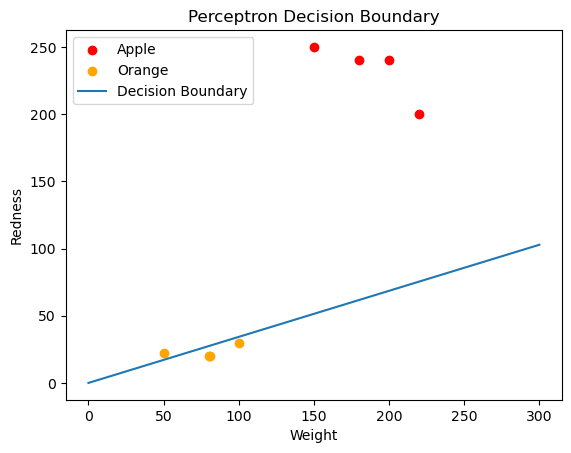

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create and train the perceptron
perceptron = Perceptron(num_features=2)
perceptron.train(training_data, labels)

# Generate points for plotting the decision boundary
x_vals = np.linspace(0, 300, 100)
y_vals = -(perceptron.weights[1] * x_vals + perceptron.weights[0]) / perceptron.weights[2]

# Scatter plot of training data
plt.scatter(training_data[labels == 1][:, 0], training_data[labels == 1][:, 1], color='red', label='Apple')
plt.scatter(training_data[labels == 0][:, 0], training_data[labels == 0][:, 1], color='orange', label='Orange')

# Plot the decision boundary
plt.plot(x_vals, y_vals, label='Decision Boundary')

plt.xlabel('Weight')
plt.ylabel('Redness')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.show()